In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_pic(img,x=False):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    if x == True:
        ax.imshow(img,cmap='gray')
    else:
        ax.imshow(img)

In [3]:
img = cv2.imread('../Reference/DATA/separate_coins.jpg')

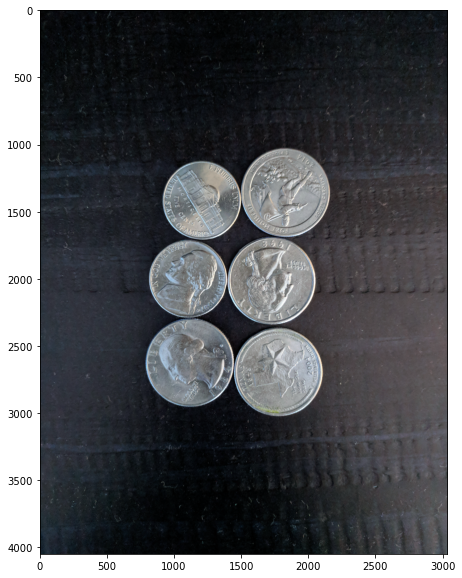

In [4]:
show_pic(img)

In [5]:
# Median Blur
# Convert to grayscale
# Binary threshold
# Find Contours

In [8]:
sep_blur = cv2.medianBlur(img,35)

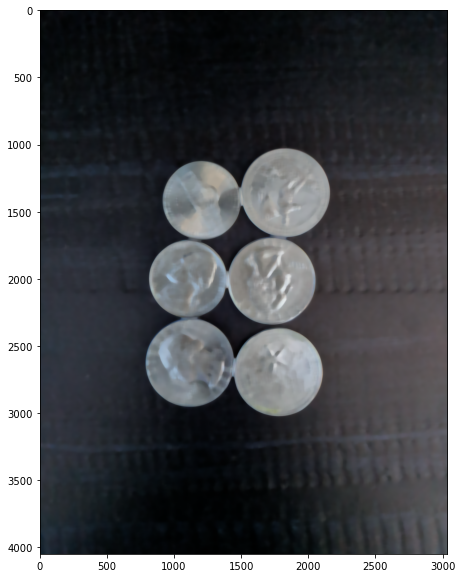

In [9]:
show_pic(sep_blur)

In [10]:
gray = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)

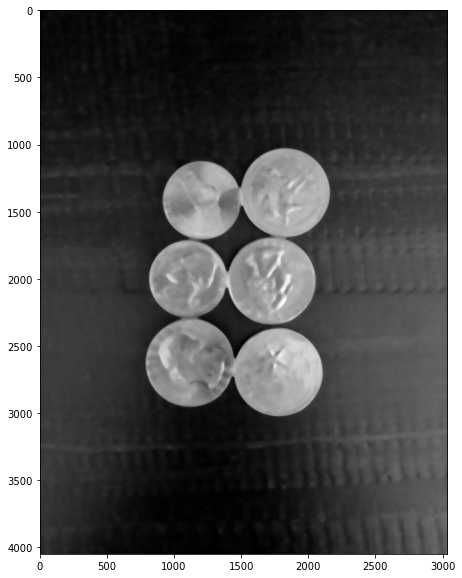

In [11]:
show_pic(gray,True)

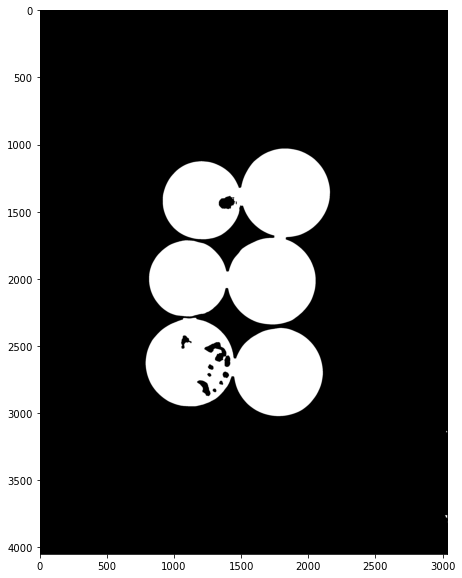

In [15]:
ret , thresh = cv2.threshold(gray,100,255,cv2.THRESH_BINARY)
show_pic(thresh,True)

In [16]:
contours,heirarchy = cv2.findContours(thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [17]:
len(contours)

15

In [19]:
len(heirarchy[0])

15

In [20]:
contours,heirarchy = cv2.findContours(thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    
    if heirarchy[0][i][3] == -1:
        cv2.drawContours(img,contours,i,(255,0,0),10)

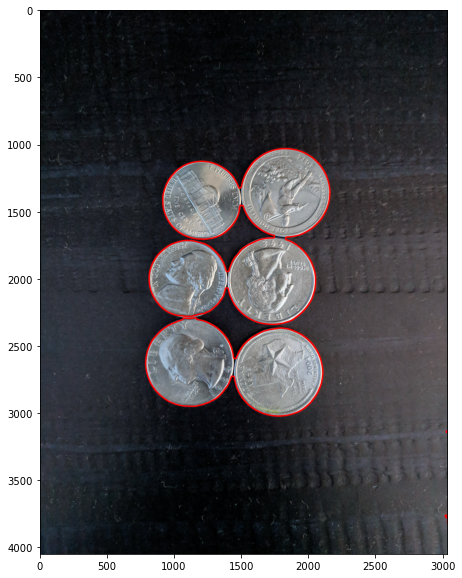

In [21]:
show_pic(img,False)

## Watershed Algorithm

In [22]:
img = cv2.imread('../Reference/DATA/separate_coins.jpg')

In [40]:
img_blur = cv2.medianBlur(img,35)
# img_blur = cv2.blur(img,(7,7))

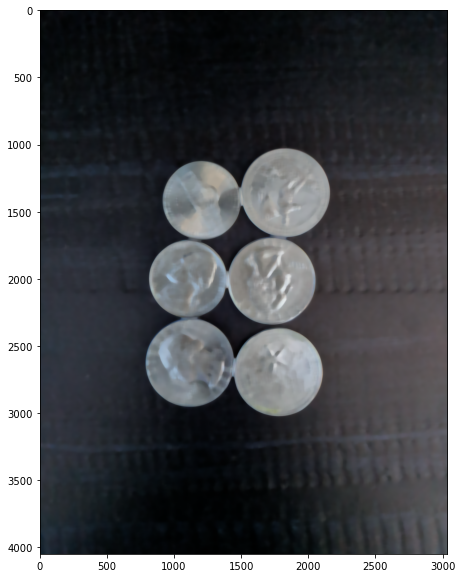

In [25]:
show_pic(img_blur)

In [26]:
gray = cv2.cvtColor(img_blur,cv2.COLOR_BGR2GRAY)

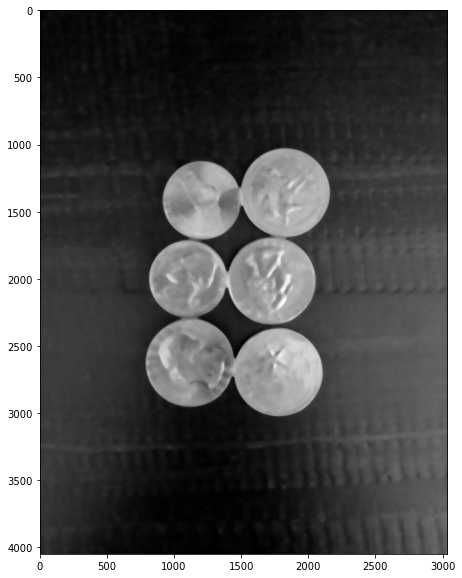

In [27]:
show_pic(gray,True)

In [56]:
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

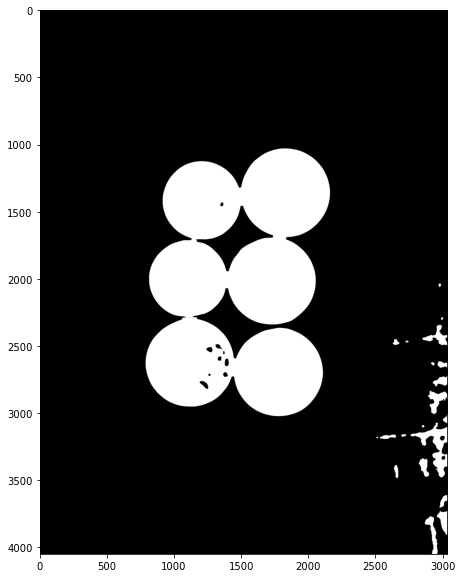

In [57]:
show_pic(thresh,True)

In [30]:
# NOISE REMOVAl

In [58]:
kernel = np.ones((5,5),dtype=np.uint8)

In [59]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=5)
sure_bg = cv2.dilate(opening,kernel,iterations=3)

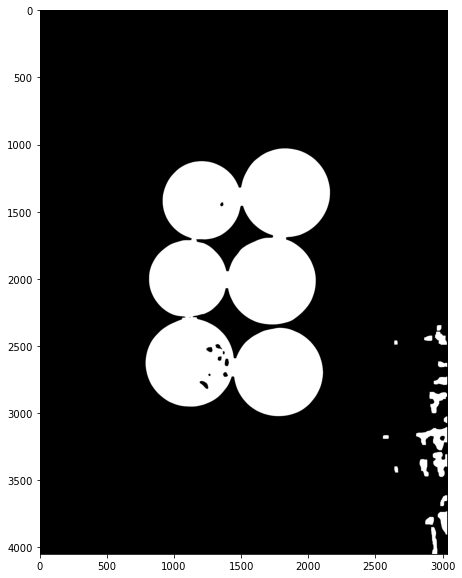

In [60]:
show_pic(opening,True)

In [61]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

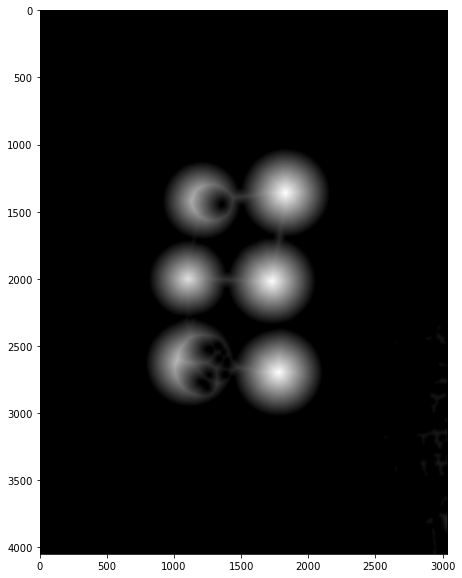

In [62]:
show_pic(dist_transform,True)

In [63]:
ret , sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

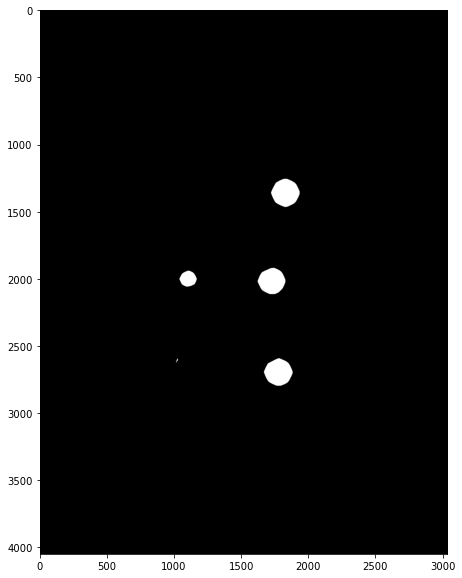

In [64]:
show_pic(sure_fg,True)

In [65]:
sure_fg = np.uint8(sure_fg)

In [66]:
unknown = cv2.subtract(sure_bg,sure_fg)

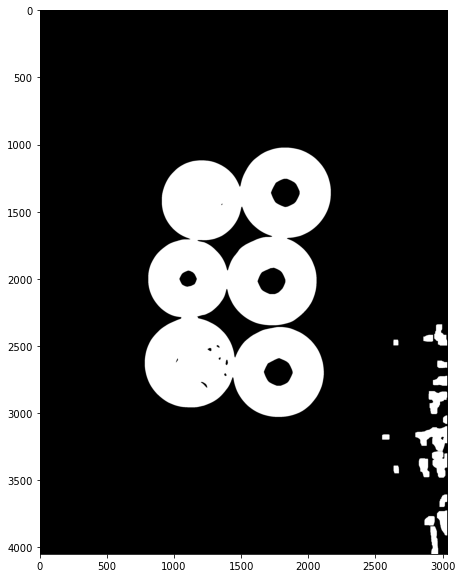

In [67]:
show_pic(unknown,True)

In [68]:
ret , markers = cv2.connectedComponents(sure_fg)

In [69]:
markers = markers + 1

In [70]:
markers[unknown==255] = 0

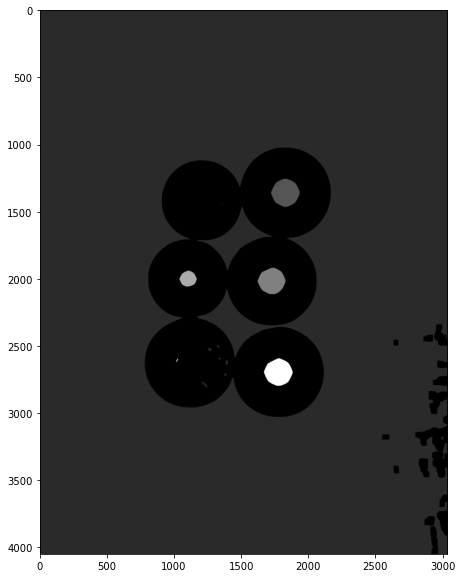

In [71]:
show_pic(markers,True)

In [72]:
markers = cv2.watershed(img,markers)

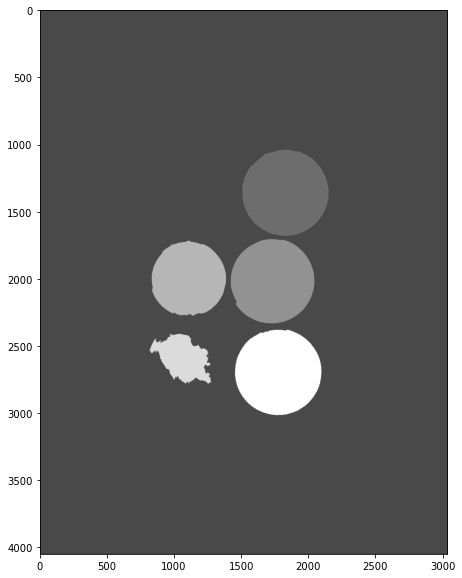

In [73]:
show_pic(markers,True)

In [74]:
contours,heirarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    
    if heirarchy[0][i][3] == -1:
        cv2.drawContours(img,contours,i,(255,0,0),10)

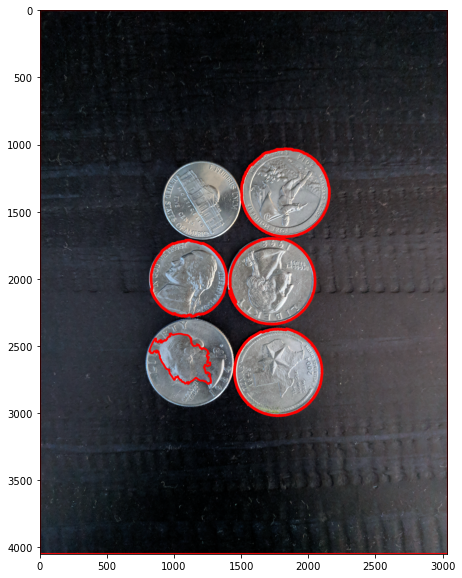

In [75]:
show_pic(img)